In [1]:
from scipy.stats import gmean
from glob import glob

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import msgpack
import os


pd.set_option("display.max_colwidth", None)


## NSGA-II Sensitivity Analysis

In [3]:
def read_results(path):

    data = []
    for algorithm in glob(path):
        for log in glob(algorithm + "/*"):
            if "Topology" in log:
                with open(log, "rb") as f:
                    metrics = msgpack.load(f, strict_map_key=False)[-1]
                    metrics["algorithm"] = algorithm
                    data.append(metrics)

    return data


data = read_results("logs/*")


In [4]:
df = pd.DataFrame(data)
df = df[["algorithm", "overall_occupation", "overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]]
df


,algorithm,overall_occupation,overall_power_consumption,delay_sla_violations,privacy_sla_violations
0,logs/algorithm=faticanti2020;,56.494681,10134.750000,10,18
1,logs/algorithm=thea;,54.231952,8214.500000,5,11
2,logs/algorithm=argos;,55.940907,9614.416667,7,19


In [5]:
df.loc[:, ("Cost")] = df[["overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]].apply(gmean, axis=1)
df = df.sort_values(by=["Cost"])
df


,algorithm,overall_occupation,overall_power_consumption,delay_sla_violations,privacy_sla_violations,Cost
1,logs/algorithm=thea;,54.231952,8214.500000,5,11,76.732840
2,logs/algorithm=argos;,55.940907,9614.416667,7,19,108.540427
0,logs/algorithm=faticanti2020;,56.494681,10134.750000,10,18,122.187988


In [6]:
df["Algorithm"] = df["algorithm"].apply(lambda x: x.split(";")[0].split("=")[1])

df.loc[df.Algorithm == "nsgaii", "PopSize"] = df.loc[df.Algorithm == "nsgaii", "algorithm"].apply(
    lambda x: int(x.split(";")[1].split("=")[1])
)
df.loc[df.Algorithm == "nsgaii", "NGen"] = df.loc[df.Algorithm == "nsgaii", "algorithm"].apply(
    lambda x: int(x.split(";")[2].split("=")[1])
)
df.loc[df.Algorithm == "nsgaii", "CrossProb"] = df.loc[df.Algorithm == "nsgaii", "algorithm"].apply(
    lambda x: float(x.split(";")[3].split("=")[1])
)
df.loc[df.Algorithm == "nsgaii", "MutProb"] = df.loc[df.Algorithm == "nsgaii", "algorithm"].apply(
    lambda x: float(x.split(";")[4].split("=")[1])
)

df


,algorithm,overall_occupation,overall_power_consumption,delay_sla_violations,privacy_sla_violations,Cost,Algorithm,PopSize,NGen,CrossProb,MutProb
1,logs/algorithm=thea;,54.231952,8214.500000,5,11,76.732840,thea,NaN,NaN,NaN,NaN
2,logs/algorithm=argos;,55.940907,9614.416667,7,19,108.540427,argos,NaN,NaN,NaN,NaN
0,logs/algorithm=faticanti2020;,56.494681,10134.750000,10,18,122.187988,faticanti2020,NaN,NaN,NaN,NaN


In [7]:
df[["algorithm", "Algorithm", "PopSize", "NGen", "CrossProb", "MutProb"]].head(5)


,algorithm,Algorithm,PopSize,NGen,CrossProb,MutProb
1,logs/algorithm=thea;,thea,NaN,NaN,NaN,NaN
2,logs/algorithm=argos;,argos,NaN,NaN,NaN,NaN
0,logs/algorithm=faticanti2020;,faticanti2020,NaN,NaN,NaN,NaN


In [8]:
# Save NSGA-II sensitivity analysis results
nsgaii_df = df.query("Algorithm == 'nsgaii' and PopSize == 300").copy()

nsgaii_df[
    [
        "Algorithm",
        "PopSize",
        "NGen",
        "CrossProb",
        "MutProb",
        "overall_occupation",
        "overall_power_consumption",
        "delay_sla_violations",
        "privacy_sla_violations",
        "Cost",
    ]
].to_csv("NSGA-II-Sensitivity-Analysis.csv", index=False, sep=",")


### Crossover and Mutation Probability Heatmap

In [9]:
nsgaii_pivot_df = pd.pivot_table(nsgaii_df, values="Cost", index="CrossProb", columns="MutProb", aggfunc=np.min)
nsgaii_pivot_df


/tmp/ipykernel_12659/563967012.py:1: FutureWarning: The provided callable <function amin at 0x7f83703cb640> is currently using DataFrameGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  nsgaii_pivot_df = pd.pivot_table(nsgaii_df, values="Cost", index="CrossProb", columns="MutProb", aggfunc=np.min)


MutProb
CrossProb


In [10]:
mut_prob = nsgaii_pivot_df.columns.values
mut_prob


array([], dtype=object)

In [11]:
cross_prob = nsgaii_pivot_df.index.values
cross_prob


array([], dtype=object)

#### Set Custom Font

In [12]:
!mkdir dependencies
!wget 'https://fonts.google.com/download?family=Roboto' -O dependencies/roboto.zip
!unzip -o dependencies/roboto.zip -d dependencies/roboto

--2024-03-06 16:26:29--  https://fonts.google.com/download?family=Roboto
Resolving fonts.google.com (fonts.google.com)... 2800:3f0:4001:82c::200e, 142.251.128.142
Connecting to fonts.google.com (fonts.google.com)|2800:3f0:4001:82c::200e|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘dependencies/roboto.zip’

dependencies/roboto     [  <=>               ]   1,06M  3,62MB/s    in 0,3s    

2024-03-06 16:26:30 (3,62 MB/s) - ‘dependencies/roboto.zip’ saved [1108906]

Archive:  dependencies/roboto.zip
  inflating: dependencies/roboto/LICENSE.txt  
  inflating: dependencies/roboto/Roboto-Thin.ttf  
  inflating: dependencies/roboto/Roboto-ThinItalic.ttf  
  inflating: dependencies/roboto/Roboto-Light.ttf  
  inflating: dependencies/roboto/Roboto-LightItalic.ttf  
  inflating: dependencies/roboto/Roboto-Regular.ttf  
  inflating: dependencies/roboto/Roboto-Italic.ttf  
  inflating: dependencies/roboto/Roboto-Medium.ttf  
  in

In [13]:
import matplotlib.font_manager

matplotlib.font_manager.findSystemFonts(fontpaths="dependencies/roboto", fontext="ttf")


['/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-BoldItalic.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-Medium.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-MediumItalic.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-ThinItalic.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-Bold.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-BlackItalic.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-Thin.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-Light.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-Black.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-LightItalic.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-Italic.ttf',
 '/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-Regular.ttf']

In [14]:
font_path = os.path.join(os.getcwd(), "dependencies/roboto/Roboto-Regular.ttf")
font_path


'/home/pandini/Desktop/thea/thea/dependencies/roboto/Roboto-Regular.ttf'

In [15]:
import matplotlib.font_manager as font_manager
import matplotlib as mpl
import os

prop = font_manager.FontProperties(fname=font_path)
plt.rcParams["font.family"] = prop.get_name()
plt.rcParams["font.weight"] = 300


#### Plot

ValueError: zero-size array to reduction operation fmin which has no identity

findfont: Font family ['Roboto'] not found. Falling back to DejaVu Sans.


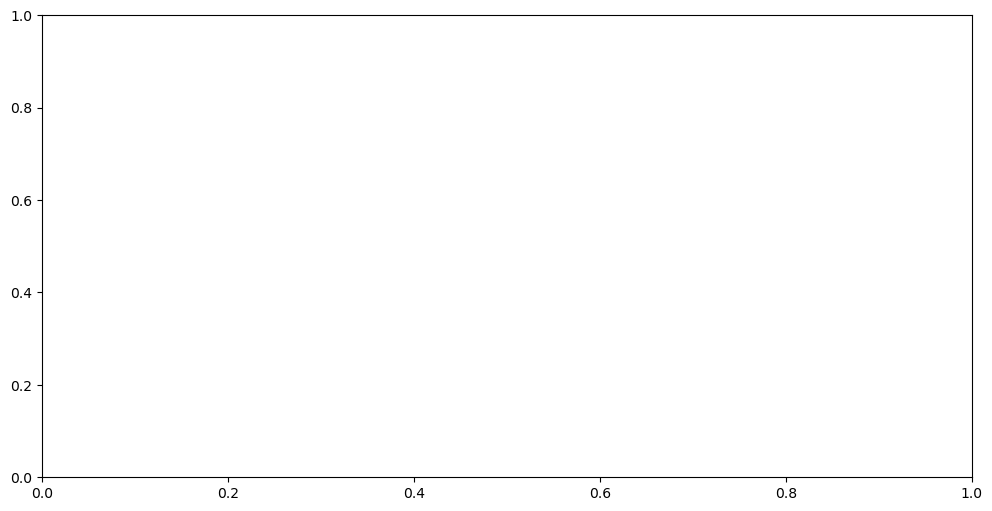

In [16]:
import matplotlib.colors as colors

fig, ax = plt.subplots(figsize=(12, 6))

cmap = colors.ListedColormap(plt.cm.Greys(np.linspace(0.25, 1, 10)), "name")

ax = sns.heatmap(
    nsgaii_pivot_df.values,
    annot=True,
    fmt=".2f",
    cmap=cmap,
    xticklabels=mut_prob,
    yticklabels=cross_prob,
    annot_kws={"size": 15},  # "family": "roboto"},
    cbar_kws={"orientation": "vertical", "pad": 0.01},
)

ax.invert_yaxis()

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=15)

ax.tick_params(axis="both", which="major", labelsize=16)

ax.set_xlabel("Mutation Probability", fontsize=18, fontweight="bold")
ax.set_ylabel("Crossover Probability", fontsize=18, fontweight="bold")

plt.savefig(f"nsgaii-probability-heatmap.pdf", dpi=300, bbox_inches="tight")


### Best Parameters

In [ ]:
best = nsgaii_df[
    [
        "algorithm",
        "Algorithm",
        "PopSize",
        "NGen",
        "CrossProb",
        "MutProb",
        "overall_occupation",
        "overall_power_consumption",
        "delay_sla_violations",
        "privacy_sla_violations",
        "Cost",
    ]
].copy()

best.sort_values(by=["Cost", "NGen"], inplace=True)

best.head(20)


In [ ]:
best_nsgaii_parameters = best.iloc[0, 0]
best_nsgaii_parameters


## Results

In [ ]:
algorithms = [
    "logs/algorithm=argos;",
    "logs/algorithm=faticanti2020;",
    "logs/algorithm=thea;",
    best_nsgaii_parameters,
]

algorithms

In [ ]:
results = []
for row in data:
    if row["algorithm"] in algorithms:
        print("algorithm: {}".format(row["algorithm"]))
        row["Algorithm"] = row["algorithm"].split(";")[0].split("=")[1]
        results.append(row)


In [ ]:
results_df = pd.DataFrame(results)

results_df[
    ["algorithm", "overall_occupation", "overall_power_consumption", "delay_sla_violations", "privacy_sla_violations"]
].sort_values(by=["algorithm"], ascending=True).reset_index(drop=True)


In [ ]:
for item in ["provider", "model", "chain_size", "delay_sla", "privacy_requirement"]:

    df = pd.json_normalize(results, record_path=[item], meta=["algorithm"])

    # shift column 'algorithm' to first position
    algorithm = df.pop("algorithm")
    df.insert(0, "algorithm", algorithm)

    if item == "model":
        df = df.sort_values(by=["algorithm", "model_name"], ascending=True).reset_index(drop=True)

    if item == "privacy_requirement":
        df = df.sort_values(by=["algorithm", "privacy_requirement"], ascending=True).reset_index(drop=True)

    if item == "chain_size":
        df = df.sort_values(by=["algorithm", "chain_size"], ascending=True).reset_index(drop=True)

    display(df)


## Custom Metrics

In [ ]:
def read_algorithms_results(path, algorithms, item):

    dfs = []
    for algorithm in glob(path):

        if algorithm not in algorithms:
            continue

        print(algorithm)

        with open(f"{algorithm}/{item}.msgpack", "rb") as f:
            data = msgpack.load(f, strict_map_key=False)

        df = pd.DataFrame(data)
        df.loc[:, ("Algorithm")] = algorithm.split("/")[-1]
        df = df[df["Time Step"] == df["Time Step"].max()]

        dfs.append(df)

    return dfs


### Communication Path Size

In [ ]:
def add_app_chain_size_and_delay_sla(df):
    df.loc[:, ("Application Chain Size")] = [1, 1, 2, 2, 4, 4, 8, 8, 1, 1, 2, 2, 4, 4, 8, 8]
    df.loc[:, ("Delay SLA")] = [3, 6, 3, 3, 6, 3, 6, 6, 3, 6, 3, 6, 3, 3, 6, 6]

    return df


In [ ]:
algorithms = [
    "logs/algorithm=argos;",
    "logs/algorithm=faticanti2020;",
    "logs/algorithm=thea;",
    best_nsgaii_parameters,
]

dfs = read_algorithms_results("logs/*", algorithms, "User")

df = pd.concat([add_app_chain_size_and_delay_sla(df) for df in dfs])


In [ ]:
def compute_path_lengh(x):
    path_len = 0

    for path_list in x.values():
        for sublist in path_list:
            if (len(sublist) - 1) > 0:
                path_len += len(sublist) - 1

    return path_len


assert compute_path_lengh({"1": [[78, 69, 61, 62, 63]]}) == 4
assert compute_path_lengh({'5': [[10, 20, 21, 22, 23, 24], [], [], [24, 14]]}) == 6


In [ ]:
get_dict_value = lambda x: list(x.values())[0]

assert get_dict_value({"1": 4}) == 4


In [ ]:
df = pd.concat(dfs)

df["Delay Value"] = df["Delays"].map(get_dict_value)
df["Delay SLA Violation"] = df["Delay Value"] > df["Delay SLA"]
df["Communication Path Size"] = df["Communication Paths"].map(compute_path_lengh)

df[["Delays", "Delay Value", "Delay SLA", "Delay SLA Violation"]].head(5)

In [ ]:
gp = df.groupby(["Algorithm", "Application Chain Size"])["Communication Path Size"].mean().reset_index()
gp


In [ ]:
# Communication Path Size by Application Chain Size
gp.pivot_table(index="Application Chain Size", columns="Algorithm", values="Communication Path Size")


### Delay SLA Violations by App Chain Size

In [ ]:
gp = df.groupby(["Algorithm", "Application Chain Size"])["Delay SLA Violation"].sum().reset_index()
gp


In [ ]:
# Delay SLA Violations by Application Chain Size
gp.pivot_table(index="Algorithm", columns="Application Chain Size", values="Delay SLA Violation")


### Number of Services on Servers with Exceeding Trust

In [ ]:
# Importing EdgeSimPy components
from edge_sim_py import *

simulator = Simulator()
simulator.initialize(input_file="datasets/dataset1.json")


In [ ]:
service_requirements = {}

user_providers_trust = {}
user_id_services = {}

edge_server_ip = {}

for user in User.all():
    user_id_services[user.id] = []
    user_providers_trust[user.id] = user.providers_trust

    for app in user.applications:
        for service in app.services:
            user_id_services[user.id].append(service.id)
            service_requirements[service.id] = service.privacy_requirement

for edge_server in EdgeServer.all():
    edge_server_ip[edge_server.id] = edge_server.infrastructure_provider

user_id_services


In [ ]:
print(service_requirements)


In [ ]:
print(edge_server_ip)


In [ ]:
user_providers_trust


In [ ]:
def check_exceeding_trust(row):
    service_requirement = row["Service Requirement"]
    user_providers_trust = row["User Providers Trust"]
    infrastructure_provider = row["Infrastructure Provider"]

    return user_providers_trust[str(infrastructure_provider)] > service_requirement


def compute_exceeding_trust(service_df):

    service_df = service_df[service_df["Time Step"] == service_df["Time Step"].max()]

    service_df.loc[:, ("Server")] = service_df["Server"].astype(int)

    service_df.loc[:, ("Service Requirement")] = service_df["Instance ID"].map(lambda x: service_requirements[x])
    service_df.loc[:, ("Infrastructure Provider")] = service_df["Server"].map(lambda x: edge_server_ip[x])

    get_user_id_by_service_id = lambda service_id: [k for k, v in user_id_services.items() if service_id in v][0]
    service_df.loc[:, ("User ID")] = service_df["Instance ID"].map(get_user_id_by_service_id)
    service_df.loc[:, ("User Providers Trust")] = service_df["User ID"].map(lambda user_id: user_providers_trust[user_id])

    service_df.loc[:, ("Exceeding Trust")] = service_df.apply(check_exceeding_trust, axis=1)

    return service_df


In [ ]:
algorithms = [
    "logs/algorithm=argos;",
    "logs/algorithm=faticanti2020;",
    "logs/algorithm=thea;",
    best_nsgaii_parameters,
]

dfs = read_algorithms_results("logs/*", algorithms, "Service")

df = pd.concat([compute_exceeding_trust(df) for df in dfs])


In [ ]:
df["Exceeding Trust"].head(10)


In [ ]:
gp = df.groupby("Algorithm")["Exceeding Trust"].sum().reset_index()
gp


### CPU Demand Sum by Edge Server Model

In [ ]:
edge_server_models = {}
for edge_server in EdgeServer.all():
    edge_server_models[edge_server.id] = edge_server.model_name

edge_server_models

In [ ]:
algorithms = [
    "logs/algorithm=argos;",
    "logs/algorithm=faticanti2020;",
    "logs/algorithm=thea;",
    best_nsgaii_parameters,
]

dfs = read_algorithms_results("logs/*", algorithms, "EdgeServer")

edge_server_df = pd.concat(dfs)


In [ ]:
edge_server_df["Model Name"] = edge_server_df["Instance ID"].map(lambda edge_server_id: edge_server_models[edge_server_id])

edge_server_df[["Object", "Model Name", "CPU Demand"]].head(5)

In [ ]:
edge_server_df.groupby(["Algorithm", "Model Name"])["CPU Demand"].sum().reset_index()
